# EDA

Visualize at least two quantitative variables and two categorical variables. Your visualizations must be relevant to your research questions! 

Describe any trends you observe, and any relationships you may want to follow up on. 

Explain how your visualizations should be relevant to your research questions: either by motivating the question, or suggesting a potential answer. You must explain why they are relevant.


First research questions: What economic conditions within a state influence campaign finance and voter support for candidates? 

Second research questions: What types of endorsements (e.g. political organizations, public figures, social media, etc.) are most influential in determining a candidate’s success in primary elections?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dem = pd.read_csv('dem_candidates.csv')
dem.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
rep = pd.read_csv('rep_candidates.csv', encoding='latin1')
rep.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,NaN,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,NaN,NaN,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,NaN,NaN,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,NaN,NaN,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,NaN,NaN,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
con = pd.read_csv('lobbyist_bundle.csv', encoding='latin1')
con.head()

,Committee_Id,Committee_Name,Link_Image,Committee_Election_State,Committee_Election_District,Report_Type,Receipt_Date,Coverage_Start_Date,Coverage_End_Date,Quarterly_Contribution,Semi_Annual_Contribution
0,C00326801,TAMMY BALDWIN FOR SENATE,http://docquery.fec.gov/cgi-bin/fecimg/?_20241...,WI,NaN,PRE-GENERAL,25-OCT-24,01-OCT-24,16-OCT-24,0.00,0.0
1,C00867937,"TRUMP 47 COMMITTEE, INC.",http://docquery.fec.gov/cgi-bin/fecimg/?_20241...,NaN,NaN,PRE-GENERAL,24-OCT-24,01-OCT-24,16-OCT-24,519574.38,0.0
2,C00862995,COLIN ALLRED VICTORY FUND,http://docquery.fec.gov/cgi-bin/fecimg/?_20241...,NaN,NaN,PRE-GENERAL,24-OCT-24,01-OCT-24,16-OCT-24,31300.00,0.0
3,C00839597,COLIN ALLRED FOR SENATE,http://docquery.fec.gov/cgi-bin/fecimg/?_20241...,TX,NaN,PRE-GENERAL,24-OCT-24,01-OCT-24,16-OCT-24,26750.00,0.0
4,C00639146,JOSH HARDER FOR CONGRESS,http://docquery.fec.gov/cgi-bin/fecimg/?_20241...,CA,9.0,PRE-GENERAL,24-OCT-24,01-OCT-24,16-OCT-24,0.00,0.0


Quantitative Variable #1: Quarterly Contributions (Lobbyist dataset): To investigate financial support levels.

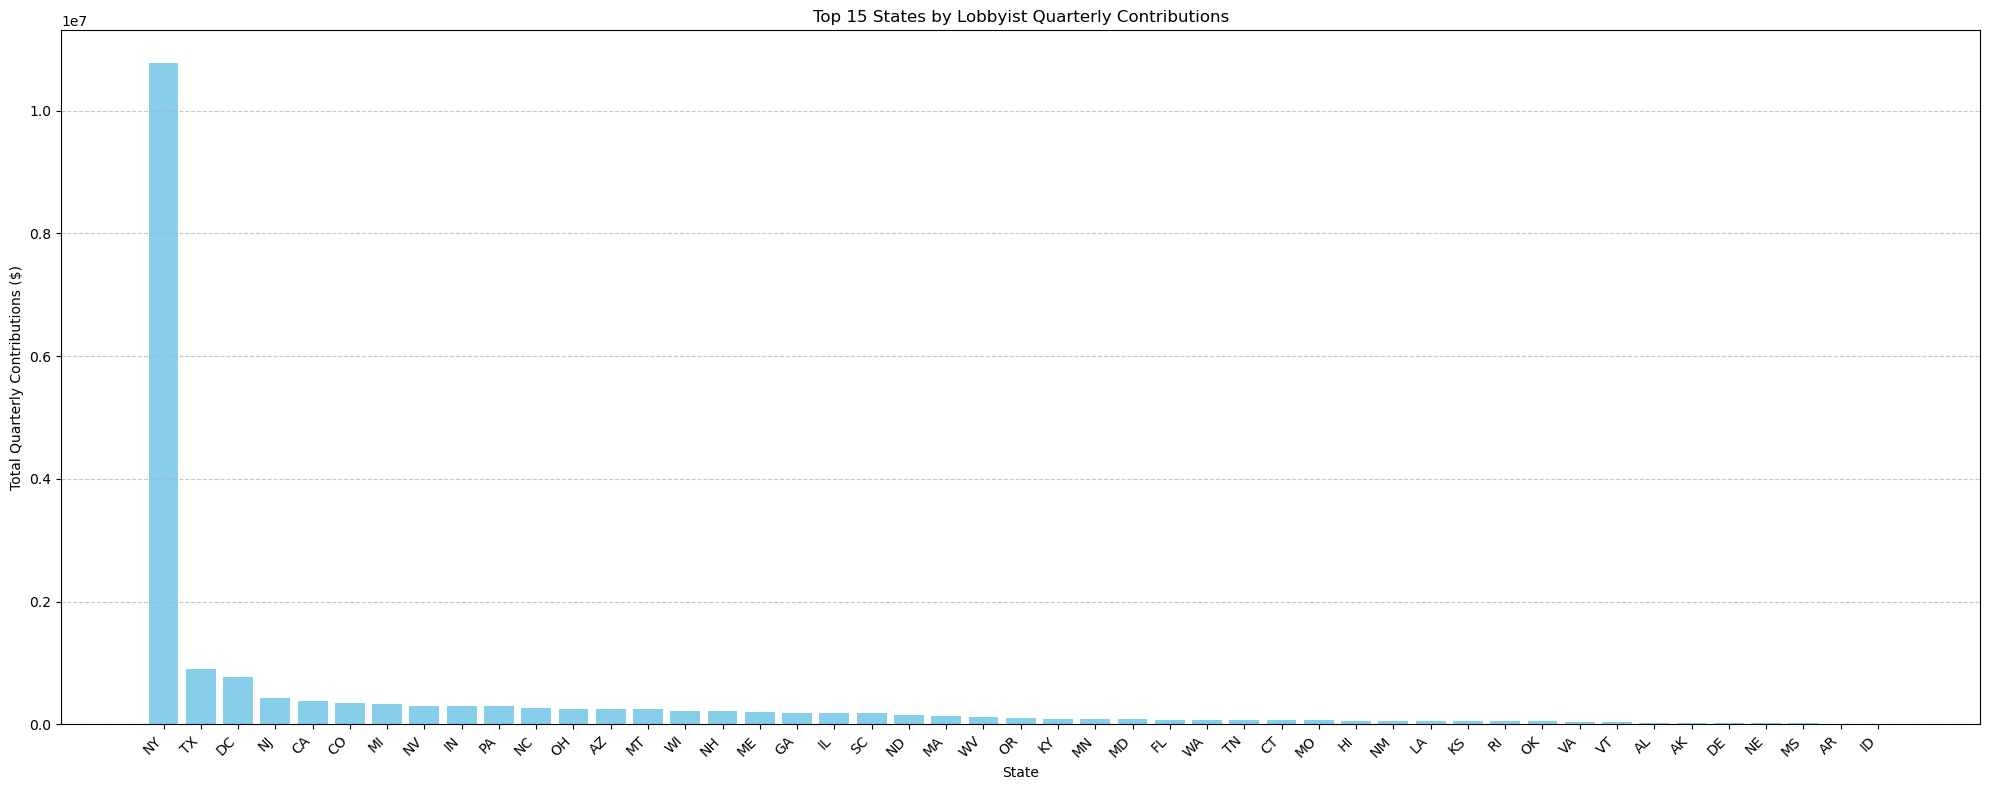

In [4]:
con = con.dropna(subset=['Committee_Election_State', 'Quarterly_Contribution'])
con['Committee_Election_State'] = con['Committee_Election_State'].astype(str)
con_sorted = con.sort_values(by='Quarterly_Contribution', ascending=False)
con_sorted['Log_Quarterly_Contribution'] = con_sorted['Quarterly_Contribution'].apply(lambda x: np.log(x) if x != 0 else np.nan)

plt.figure(figsize=(20, 8))
plt.bar(con_sorted['Committee_Election_State'], con_sorted['Quarterly_Contribution'], color='skyblue')
plt.title("Top 15 States by Lobbyist Quarterly Contributions")
plt.xlabel("State")
plt.ylabel("Total Quarterly Contributions ($)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart shows the total quarterly lobbyist contributions for the top 15 states. New York dominates with significantly higher contributions compared to all other states, followed by Texas, Washington, D.C., and New Jersey, which have moderately high contributions. Beyond the top few states, contributions drop off rapidly. This suggests that there are geographic differences in funding, which may have a different impact on campaign success in each state. The graph highlights the geographic concentration of financial resources in a few key states, suggesting that candidates from these states may benefit from greater financial support. New York, in particular, stands out as a major financial hub, home to numerous corporations and advocacy groups who actively contribute to political campaigns. Moreover, New York's diverse and influential political landscape frequently attracts substantial funding from both local and national organizations aiming to influence policy decisions or support candidates who align with their interests.

In [12]:
pip install us

Note: you may need to restart the kernel to use updated packages.


In [13]:
import us
state_name_to_abbr = {state.name: state.abbr for state in us.states.STATES}
estimated_household_annual_income['State Abbr'] = estimated_household_annual_income['State'].map(state_name_to_abbr)
estimated_household_annual_income.loc[estimated_household_annual_income['State'] == 'District of Columbia', 'State Abbr'] = 'DC'
estimated_household_annual_income.loc[estimated_household_annual_income['State'] == 'Puerto Rico', 'State Abbr'] = 'PR'

dem_income_data = pd.merge(estimated_household_annual_income, dem, left_on='State Abbr', right_on='State')
dem_income_data.head()

,State_x,Median Household Income,Mean Household Income,Estimated Total Households,"% of Households Total Income Less than $10,000","% of Households Total Income $10,000 to $14,999","% of Households Total Income $15,000 to $24,999","% of Households Total Income $25,000 to $34,999","% of Households Total Income $35,000 to $49,999","% of Households Total Income $50,000 to $74,999",...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Alabama,62212,85530,2051545,6.4,4.8,9.0,8.9,11.4,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,62212,85530,2051545,6.4,4.8,9.0,8.9,11.4,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,62212,85530,2051545,6.4,4.8,9.0,8.9,11.4,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,62212,85530,2051545,6.4,4.8,9.0,8.9,11.4,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,62212,85530,2051545,6.4,4.8,9.0,8.9,11.4,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dem_income_data.columns

Index(['State_x', 'Median Household Income', 'Mean Household Income',
       'Estimated Total Households',
       '% of Households Total Income Less than $10,000',
       '% of Households Total Income $10,000 to $14,999',
       '% of Households Total Income $15,000 to $24,999',
       '% of Households Total Income $25,000 to $34,999',
       '% of Households Total Income $35,000 to $49,999',
       '% of Households Total Income $50,000 to $74,999',
       '% of Households Total Income $75,000 to $99,999',
       '% of Households Total Income $100,000 to $149,999',
       '% of Households Total Income $150,000 to $199,999',
       '% of Households Total Income $200,000 or more', 'State Abbr',
       'Candidate', 'State_y', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'ST

Quantitative Variable #2: Median Household Income: To investigate how household income relates to voter turnout by state & party

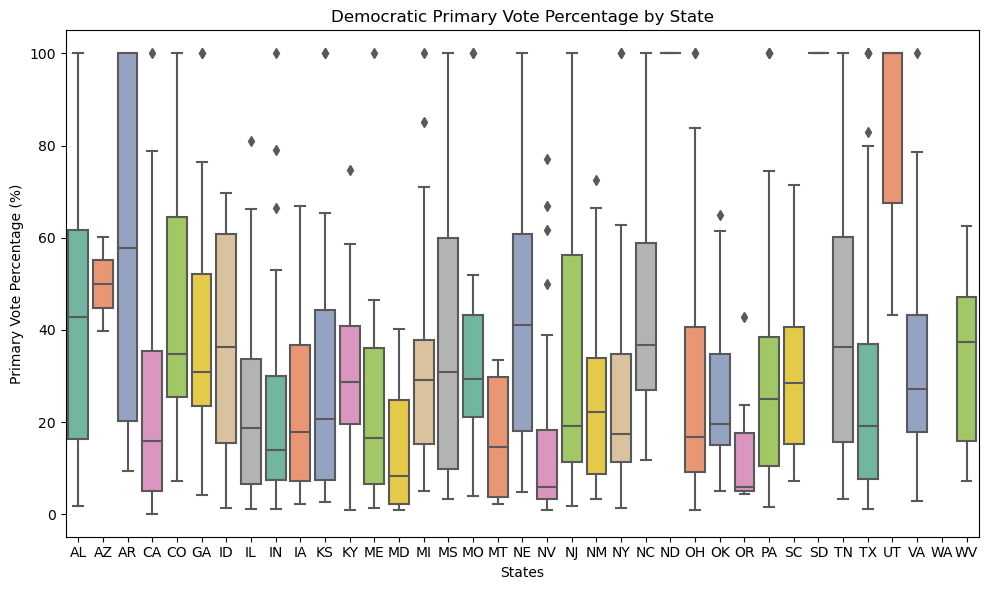

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=dem_income_data,
    x='State_y',
    y='Primary %',
    palette='Set2'
)
plt.title('Democratic Primary Vote Percentage by State')
plt.xlabel('States')
plt.ylabel('Primary Vote Percentage (%)')
plt.tight_layout()

In [16]:
estimated_household_annual_income[(estimated_household_annual_income['State Abbr'] == 'UT') |
                                  (estimated_household_annual_income['State Abbr'] == 'AR') |
                                  (estimated_household_annual_income['State Abbr'] == 'NV') |
                                  (estimated_household_annual_income['State Abbr'] == 'OR') |
                                  (estimated_household_annual_income['State Abbr'] == 'CA')]

,State,Median Household Income,Mean Household Income,Estimated Total Households,"% of Households Total Income Less than $10,000","% of Households Total Income $10,000 to $14,999","% of Households Total Income $15,000 to $24,999","% of Households Total Income $25,000 to $34,999","% of Households Total Income $35,000 to $49,999","% of Households Total Income $50,000 to $74,999","% of Households Total Income $75,000 to $99,999","% of Households Total Income $100,000 to $149,999","% of Households Total Income $150,000 to $199,999","% of Households Total Income $200,000 or more",State Abbr
3,Arkansas,58700,81056,1232871,6.3,5.2,9.0,9.3,12.8,18.2,12.5,14.6,5.6,6.3,AR
4,California,95521,134491,13699816,4.8,3.0,5.2,5.4,8.2,13.5,11.9,17.8,11.2,19.1,CA
28,Nevada,76364,103067,1224685,5.5,2.5,6.0,7.2,10.6,17.4,13.7,18.2,8.8,10.2,NV
37,Oregon,80160,107214,1752050,5.0,3.4,6.4,6.2,9.9,16.0,13.5,18.4,9.4,11.8,OR
44,Utah,93421,117752,1167591,3.2,2.1,4.2,5.2,8.7,15.5,14.6,22.0,11.5,13.0,UT


In [17]:
dem_avg = dem.groupby('State')['Primary %'].mean().reset_index()
rep_avg = rep.groupby('State')['Primary %'].mean().reset_index()

dem_avg_data = pd.merge(estimated_household_annual_income, dem_avg, left_on='State Abbr', right_on='State')
rep_avg_data = pd.merge(estimated_household_annual_income, rep_avg, left_on='State Abbr', right_on='State')

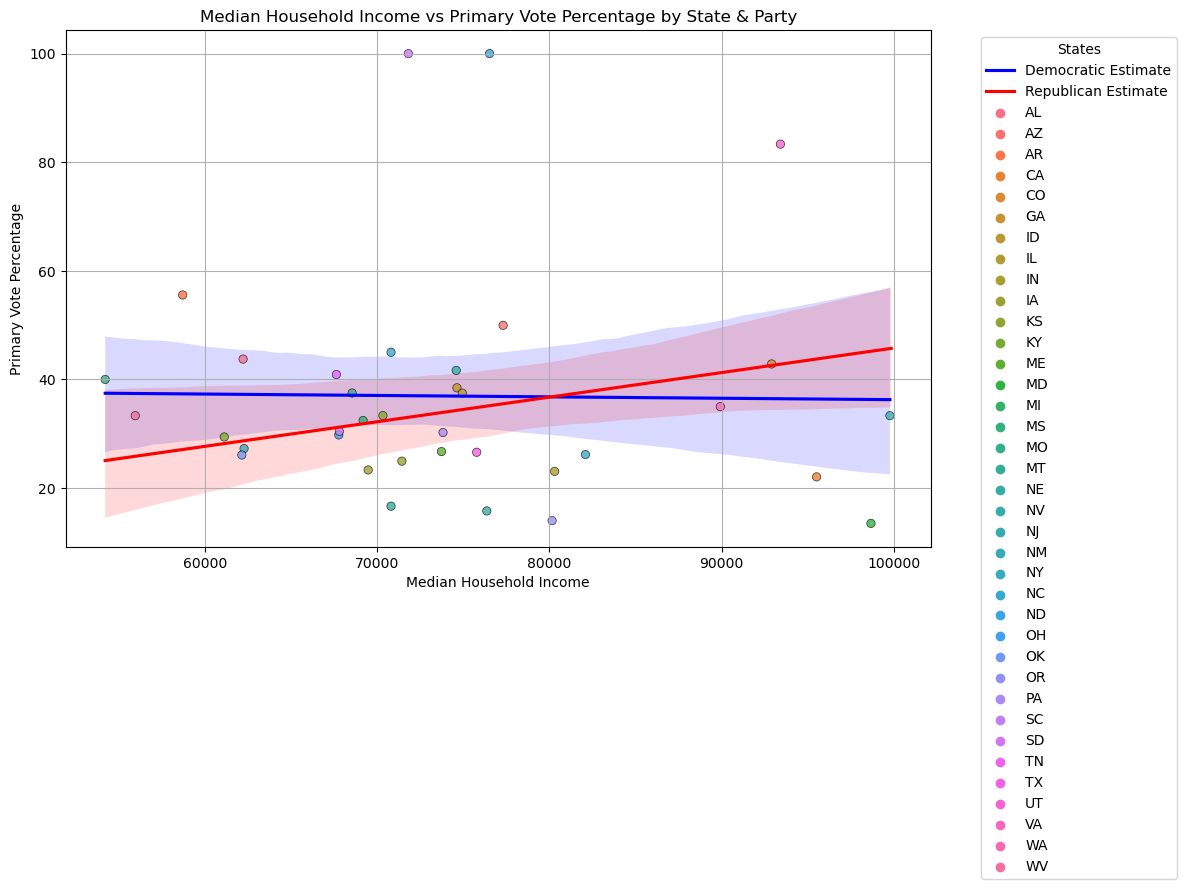

In [18]:
plt.figure(figsize=(12, 8))
sns.regplot(
    data = dem_avg_data,
    x = 'Median Household Income',
    y = 'Primary %',
    scatter = False,
    color = 'blue',
    label = 'Democratic Estimate'
)

sns.regplot(
    data = rep_avg_data,
    x = 'Median Household Income',
    y = 'Primary %',
    scatter = False,
    color = 'red',
    label = 'Republican Estimate'
)

sns.scatterplot(
    data=dem_avg_data,
    x='Median Household Income',
    y='Primary %',
    hue='State_y',
    alpha=0.8,
    edgecolor='black'
)

plt.title('Median Household Income vs Primary Vote Percentage by State & Party')
plt.xlabel('Median Household Income')
plt.ylabel('Primary Vote Percentage')

plt.legend(bbox_to_anchor=(1.05, 1), title = 'States', loc = 'upper left')
plt.grid(True)

plt.tight_layout()

By combining the data from U.S. Census with the democratic candidates, Arkansas and Utah seem to have the highest primary vote percentage, Nevada and Oregon have the lowest primary vote percentage, where Utah has the highest median household income, and Arkansas has the lowest median household income. 1 interesting note is that California has a median household income higher than all these 4 states, but the primary vote percentage is pretty low, which can be shown by the second scatter plot above.

Categorical Variable #1: Income Brackets: We transformed the above into a categorical variable to see how income range correlates with primary voter turnout

In [19]:
low = estimated_household_annual_income['Median Household Income'].quantile(0.33)
high = estimated_household_annual_income['Median Household Income'].quantile(0.66)

def categorize_income(income):
    if income < low:
        return 'Low'
    elif income < high:
        return 'Middle'
    else:
        return 'High'

estimated_household_annual_income['Income Range'] = estimated_household_annual_income['Median Household Income'].apply(categorize_income)

In [20]:
dem_avg_data = pd.merge(estimated_household_annual_income, dem_avg, left_on = 'State Abbr', right_on = 'State')
rep_avg_data = pd.merge(estimated_household_annual_income, rep_avg, left_on = 'State Abbr', right_on = 'State')

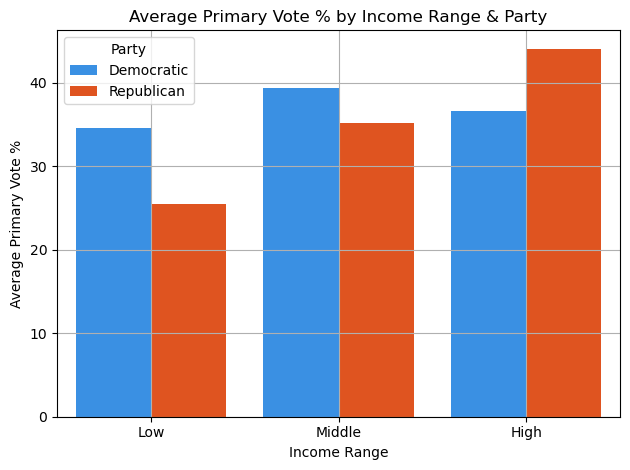

In [21]:
inc_order = ['Low', 'Middle', 'High']
dem_avg_income = dem_avg_data.groupby('Income Range')['Primary %'].mean().reset_index()
dem_avg_income['Party'] = 'Democratic'

rep_avg_income = rep_avg_data.groupby('Income Range')['Primary %'].mean().reset_index()
rep_avg_income['Party'] = 'Republican'

all_avg_income = pd.concat([dem_avg_income, rep_avg_income])

sns.barplot(data = all_avg_income, x = 'Income Range', y = 'Primary %', hue = 'Party', order = inc_order,
           palette = {'Democratic': 'dodgerblue', 'Republican': 'orangered'})

plt.title('Average Primary Vote % by Income Range & Party')
plt.xlabel('Income Range')
plt.ylabel('Average Primary Vote %')
plt.tight_layout()
plt.grid(True)

We split each state equally into three income ranges, then found their average primary vote % by party. This barplot suggests that states in the lower income range vote less overall, but we see something interesting in the middle and high ranges. For Republicans, the primary vote percentage rises the higher the state's income. However, for Democrats, primary vote percentage actually decreases slightly when going from middle to high income states. This may be due to the way our income ranges were split, which might not be truly indicative of the socially accepted income threshold of each state. The interpretation is that higher-income Republicans are more politically active than higher-income Democrats, meaning that a state's economic conditions may not be the only influence in voter support, and political party should be considered a more significant factor. It is also worth noting that Republicans are more involved in PACs than Democrats, who lean more toward individual contributions.

Categorical Variable #2: Committee Contributions & State Income Range: To see if there is a relation between the income range of a state and the amount of committee contributions it delivers

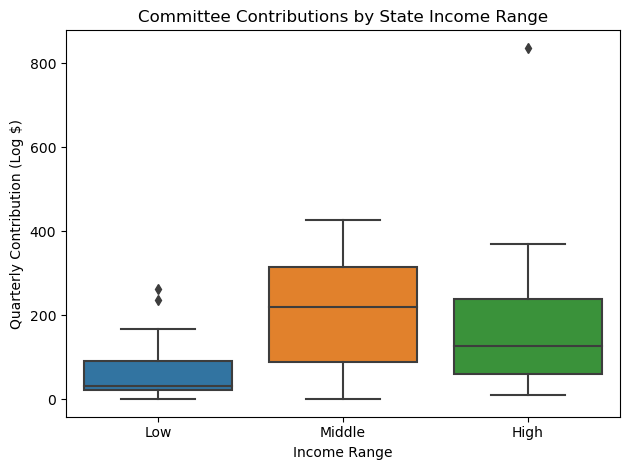

In [22]:
state_con = con_sorted.groupby('Committee_Election_State', as_index = False)['Log_Quarterly_Contribution'].sum()
state_con_and_income = state_con.merge(estimated_household_annual_income, 
    left_on = 'Committee_Election_State', right_on = 'State Abbr')

sns.boxplot(data = state_con_and_income, x = 'Income Range', y = 'Log_Quarterly_Contribution', order = inc_order)
plt.title("Committee Contributions by State Income Range")
plt.ylabel('Quarterly Contribution (Log $)')
plt.tight_layout()

This boxplot connects a state's income range to its committee contributions. We see the same trend we saw above with Democratic primary vote % by state income level. Contributions rise significantly from lower income range states to middle income range states, but then they fall for high income range states. Committees from middle income range states contribute the most financially compared to any other income range. This could be interpreted in a couple of ways. Grassroots support typically comes from middle-income voters who have enough finances to chip in to campaigns, which is typically the most popular form of financial support for a campaign regardless of party. Regardless of the medians, we see that high income states have extremely high outliers, and low income states also have relatively high outliers. This is likely due to contributions from billionaires who live in high-income states, and from wealthier individuals who live in low-income states and heavily overshadow the typically low donation.

# Multiple Hypothesis testing
The question we seek to answer is: What economic conditions within a state influence campaign finance and voter support for candidates?

Testing multiple hypotheses is necessary because campaign finance is a complex phenomenon influenced by economic, demographic, and political factors. By testing multiple hypotheses and analyzing multiple variables like poverty, tax rates, economic growth, we can identify which factors play the most significant roles and how they interact with each others.

## 1st Hypothesis Test
- H0: state poverty rates do not affect campaign contributions.
- H1: higher state poverty rates reduce campaign finance.

The hypothesis explores the relationship between state unemployment rates and campaign spending. We aim to identify whether candidates in states with higher unemployment face financial disadvantages, which could impact their campaign effectiveness and overall competitiveness in elections. We aim to identify whether candidates in states with higher poverty are less likely to financially support political campaigns. We'll be using OLS regression analysis due to its simple interpretability and linearity since we're only quantifying for correlation based on the independent variable of poverty rate and dependent variable of quarterly contribution.

In [25]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.multitest import multipletests

unemployment_data = pd.read_csv('Unemployment in America Per US State.csv')
campaign_data = pd.read_csv('lobbyist_bundle.csv')
state_name_to_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

unemployment_data.rename(columns={'State/Area': 'State'}, inplace=True)
unemployment_filtered = unemployment_data.groupby('State')['Percent (%) of Labor Force Unemployed in State/Area'].mean().reset_index()
unemployment_filtered.rename(columns={'Percent (%) of Labor Force Unemployed in State/Area': 'Unemployment Rate'}, inplace=True)
unemployment_filtered['State'] = unemployment_filtered['State'].map(state_name_to_abbr)

campaign_data.rename(columns={'Committee_Election_State': 'State'}, inplace=True)
merged_data = pd.merge(campaign_data, unemployment_filtered, on='State', how='inner')
merged_data.dropna(subset=['Quarterly_Contribution', 'Unemployment Rate'], inplace=True)

print("Merged Data Preview:")
print(merged_data.head())
print(f"Total rows in merged_data: {len(merged_data)}")

X = merged_data['Unemployment Rate']
y = merged_data['Quarterly_Contribution']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

Merged Data Preview:
  Committee_Id            Committee_Name  \
0    C00326801  TAMMY BALDWIN FOR SENATE   
1    C00326801  TAMMY BALDWIN FOR SENATE   
2    C00326801  TAMMY BALDWIN FOR SENATE   
3    C00326801  TAMMY BALDWIN FOR SENATE   
4    C00326801  TAMMY BALDWIN FOR SENATE   

                                          Link_Image State  \
0  http://docquery.fec.gov/cgi-bin/fecimg/?_20241...    WI   
1  http://docquery.fec.gov/cgi-bin/fecimg/?_20241...    WI   
2  http://docquery.fec.gov/cgi-bin/fecimg/?_20240...    WI   
3  http://docquery.fec.gov/cgi-bin/fecimg/?_20240...    WI   
4  http://docquery.fec.gov/cgi-bin/fecimg/?_20240...    WI   

   Committee_Election_District                   Report_Type Receipt_Date  \
0                          NaN                   PRE-GENERAL    25-OCT-24   
1                          NaN             OCTOBER QUARTERLY    15-OCT-24   
2                          1.0  JULY QUARTERLY / SEMI-ANNUAL    15-JUL-24   
3                          NaN   

In [26]:
exact_p_value = model.pvalues['Unemployment Rate']
print(f"p-value for Unemployment Rate: {exact_p_value}")

p-value for Unemployment Rate: 1.705847938588689e-05


The regression shows a positive relationship between unemployment rates and campaign spending. For every 1% increase in unemployment rate, campaign spending increases by $70,410. We reject the null hypothesis because the P-value is 1.69e-05.

In [27]:
effect_size = model.params['Unemployment Rate'] / model.bse['Unemployment Rate']
nobs = merged_data.shape[0] 
alpha = 0.05

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=nobs, alpha=alpha, alternative='two-sided')
print(f"Power of the test: {power}")

Power of the test: 1.0


The power indicating the analysis is highly reliable and has sufficient sensitivity to detect the observed effect size. However, the R^2 value of 0.008 suggests unemployment rates explain only 0.8% of the variation in campaign spending, highlighting the influence of other unobserved factors.

## 2nd Hypothesis Test
- H0: state income levels within a state have no effect on voter support for candidates.
- H1: higher state income levels can increase voter support for candidates.

The hypothesis examines whether voter support is influenced by the wealth of their region. Wealthier regions may have different levels of political engagement or priorities compared to less wealthy neighborhoods. This may affect how they vote and potential campaign strategies. We'll be using OLS again since we're only predicting based on two variables for a clear and readable correlation.

In [28]:
import pandas as pd

candidate_data = pd.read_csv('rep_candidates.csv', encoding='latin1')
income_data = pd.read_csv('counties_per_capita_income.csv')

state_abbreviation_to_full = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas",
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware",
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho",
    "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas",
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada",
    "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York",
    "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah",
    "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming"
}


candidate_data['State'] = candidate_data['State'].map(state_abbreviation_to_full)
candidate_data['State'] = candidate_data['State'].str.strip()
income_data['states'] = income_data['states'].str.strip()
merged_data = pd.merge(candidate_data, income_data, left_on='State', right_on='states', how='inner')

critical_columns = ['Primary %', 'pci']
merged_data = merged_data.dropna(subset=critical_columns)

print("Merged Data Preview:")
print(merged_data.head())
print(f"Total rows in merged_data: {len(merged_data)}")

Merged Data Preview:
       Candidate   State            District Office Type Race Type  \
0  Mike Dunleavy  Alaska  Governor of Alaska    Governor   Regular   
1  Mike Dunleavy  Alaska  Governor of Alaska    Governor   Regular   
2  Mike Dunleavy  Alaska  Governor of Alaska    Governor   Regular   
3  Mike Dunleavy  Alaska  Governor of Alaska    Governor   Regular   
4  Mike Dunleavy  Alaska  Governor of Alaska    Governor   Regular   

  Race Primary Election Date Primary Status Primary Runoff Status  \
0                    8/21/18       Advanced                   NaN   
1                    8/21/18       Advanced                   NaN   
2                    8/21/18       Advanced                   NaN   
3                    8/21/18       Advanced                   NaN   
4                    8/21/18       Advanced                   NaN   

  General Status  Primary %  ... Main Street Endorsed? Chamber Endorsed?  \
0  On the Ballot       61.8  ...                   NaN             

In [29]:
import pandas as pd
import statsmodels.api as sm


merged_data['pci_cleaned'] = merged_data['pci'].str.replace('[\$,]', '', regex=True).astype(float)
merged_data['Primary %'] = pd.to_numeric(merged_data['Primary %'], errors='coerce')
cleaned_data = merged_data.dropna(subset=['pci_cleaned', 'Primary %'])
cleaned_data = cleaned_data.drop_duplicates()

print(cleaned_data[['pci_cleaned', 'Primary %']].dtypes)
print("Descriptive Statistics for Cleaned Data:")
print(cleaned_data[['pci_cleaned', 'Primary %']].describe())


X = cleaned_data['pci_cleaned']
y = cleaned_data['Primary %']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

pci_cleaned    float64
Primary %      float64
dtype: object
Descriptive Statistics for Cleaned Data:
        pci_cleaned     Primary %
count  57963.000000  57963.000000
mean   23887.802408     29.885034
std     5849.854860     31.939010
min     8768.000000      0.000000
25%    20235.000000      4.340000
50%    22953.000000     18.350000
75%    26525.000000     43.670000
max    76592.000000    100.000000
                            OLS Regression Results                            
Dep. Variable:              Primary %   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     676.2
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          3.17e-148
Time:                        12:27:16   Log-Likelihood:            -2.8268e+05
No. Observations:               57963   AIC:                         5.654e+05
Df Residuals:                   57961   

The regression shows per capita income has a significant positive relationship with voter support percentage (Primary %). For every additional dollar in per capita income, voter support increases by 0.0006 percentage points. We reject null hypothesis because P_value is 3.17e-148.

In [30]:
from statsmodels.stats.power import TTestPower

effect_size = model.params['pci_cleaned'] / model.bse['pci_cleaned']
nobs = len(cleaned_data)

alpha = 0.05
power_analysis = TTestPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, alternative='two-sided')
print(f"Power of the test: {power}")

Power of the test: 1.0


The power 1.0 indicating the analysis is highly reliable and has sufficient sensitivity to detect the observed effect size. 

## 3rd Hypothesis Test
- H0: density of local businesses in a state has no effect on campaign finance.
- H1: density of local businesses in a state has a significant effect on campaign finance.

The hypothesis focuses mainly on the density of small businesses how it influences campaign financing in a given state. by focusing on small businesses, we are able to determine if grassroots-level economic activity impacts campaign financing at large. Again, we'll be sticking to OLS due to only modeling on two variables and the interpretability of the correlation. Plus, the data is largely proportional so no manipulation is needed.

In [31]:
#source: https://advocacy.sba.gov/wp-content/uploads/2023/11/State-Profiles-2023.pdf
small_biz = pd.read_csv('2023 Small Business Profiles.csv')
small_biz.head()

,State,Small Businesses
0,Alabama,422586
1,Alaska,71781
2,Arizona,650151
3,Arkansas,268244
4,California,4146852


In [32]:
campaign_data = {'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'DC', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
        'Dollars_Raised': [8583672, 24377294, 40147545,40319032,793790946,60703989,5531329,10603821,2460696,418599373,50887327,4889158,11449161,110686268,91763497,37229486,5595245,32520673,5491343,10919741,2657080,64379892,48674507,7140419,1144856,108241931,43517555,33901288,24228344,15391471,10871138,26378711,112001427,248337909,17307944,87993668,24277060,48326471,126674543,8461082,23359789,4636619,16979960,317382426,23818999,3043703,7500239,124677161,20615021,150891102,3245636]}
campaign_data = pd.DataFrame(campaign_data)

biz_campaign = pd.merge(campaign_data, small_biz, on='State', how='inner')
biz_campaign.head()

,State,Dollars_Raised,Small Businesses
0,Alabama,8583672,422586
1,Alaska,24377294,71781
2,Arizona,40147545,650151
3,Arkansas,40319032,268244
4,California,793790946,4146852


In [33]:
import statsmodels.api as sm

X = biz_campaign['Small Businesses']
y = biz_campaign['Dollars_Raised']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

regression_summary = model.summary()
print(regression_summary)

                            OLS Regression Results                            
Dep. Variable:         Dollars_Raised   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     169.4
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.31e-17
Time:                        12:27:17   Log-Likelihood:                -967.67
No. Observations:                  50   AIC:                             1939.
Df Residuals:                      48   BIC:                             1943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.286e+07   1.14e+07  

Our results indicate that the coefficient for Small Businesses is 140.1331, meaning that for every additional small business in a state, the total campaign spending increases by approximately $140.13 on average. The p-value is 2.31e-17, which is extremely small. With an alpha threshold of 0.05, we would be able to successfully reject the null hypothesis and are able to demonstrate a significant positive relationship between amount of small businesses and campaign finance.

In [34]:
from statsmodels.stats.power import TTestPower

effect_size = model.params['Small Businesses'] / model.bse['Small Businesses']
nobs = len(biz_campaign)

alpha = 0.05
power_analysis = TTestPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, alternative='two-sided')
print(f"Power of the test: {power}")

Power of the test: 1.0


The power of this test is 1, meaning there is an extremely high likelihood of correctly rejecting the null hypothesis when the alternative is true. This matches what the p-value that the linear regression model returned, which was 0, as a small p-value indicates a high chance of rejecting the null hypothesis.

## 4th Hypothesis Test
- H0: economic growth rates in a state do not influence the number of small individual donations.
- H1: higher economic growth rates correlate with more small individual donations.

This hypothesis test seeks to question if there is a correlation between economic growth rates of a given state and the amount of small individual donations. Since GDP growth largely benefits every constituent, we believe it is worth focusing on smaller individual donations to get a sense of the general population's donating habits rather than PACs or committees'. Though this question requires more data manipulation since GDP growth is percentage-based and the margins are very low and we're modeling on total contributions (which isn't proportional), we'll still be sticking to OLS since we want to find a correlation between two variables.

In [35]:
#source: https://www.bea.gov/data/gdp/gdp-state
GDP_data = pd.read_csv('GDP_Growth.csv')
GDP_data.head()
state_rename = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}
GDP_data['State'] = GDP_data['State'].map(state_rename)


#source: https://www.fec.gov/data/receipts/individual-contributions/?two_year_transaction_period=2024&min_date=01%2F01%2F2023&max_date=12%2F31%2F2024
small_cons = pd.read_csv('Totals by State, 2023-2024.csv')
small_cons['Total Contributions'] = small_cons['Total Contributions'].str.replace('$', '').astype(int)
GDP_data = pd.merge(GDP_data, small_cons, on='State', how='inner')
GDP_data = GDP_data.sort_values(by = 'State', ascending = True)
GDP_data = GDP_data.reset_index(drop = True)
GDP_testing = GDP_data.drop(columns=['Rank', 'Percent to Democrats', 'Percent to Republicans'])
GDP_testing.head()

,State,GDP Growth (%),Total Contributions
0,Alabama,3.4,47350311
1,Alaska,-1.1,13703868
2,Arizona,3.1,123419175
3,Arkansas,1.5,66852291
4,California,2.8,1361749352


In [36]:
#source: https://data.census.gov/table?q=population&g=010XX00US$0400000
populations = pd.read_csv('Populations.csv').transpose()
populations = populations.reset_index().rename(columns={"index": "State", 0: "Population"})
populations = populations[populations['Population'] != 'Population'].reset_index(drop = True)
populations['Population'] = populations['Population'].str.replace(',', '').astype(int)
populations.head()

,State,Population
0,Alabama,5024279
1,Alaska,733391
2,Arizona,7151502
3,Arkansas,3011524
4,California,39538223


In [37]:
GDP = pd.merge(GDP_testing, populations, on='State', how='inner')
GDP['Donation/Population Ratio'] = GDP['Total Contributions'] / GDP['Population']
GDP['Log Donation/Population Ratio'] = np.log(GDP['Donation/Population Ratio'])
GDP = GDP.drop(columns=['Population', 'Total Contributions', 'Donation/Population Ratio'])
GDP.head()

,State,GDP Growth (%),Log Donation/Population Ratio
0,Alabama,3.4,2.243291
1,Alaska,-1.1,2.927754
2,Arizona,3.1,2.848264
3,Arkansas,1.5,3.100039
4,California,2.8,3.539258


In [38]:
import statsmodels.api as sm

X = GDP['GDP Growth (%)']
y = GDP['Log Donation/Population Ratio']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

regression_summary = model.summary()
print(regression_summary)

                                  OLS Regression Results                                 
Dep. Variable:     Log Donation/Population Ratio   R-squared:                       0.009
Model:                                       OLS   Adj. R-squared:                 -0.012
Method:                            Least Squares   F-statistic:                    0.4253
Date:                           Wed, 11 Dec 2024   Prob (F-statistic):              0.517
Time:                                   12:27:17   Log-Likelihood:                -65.523
No. Observations:                             51   AIC:                             135.0
Df Residuals:                                 49   BIC:                             138.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------

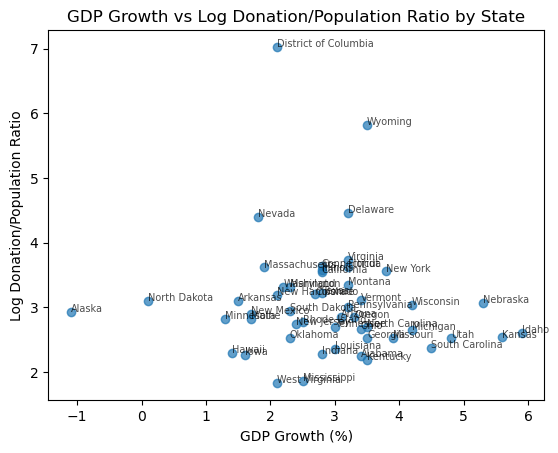

In [39]:
plt.scatter(GDP['GDP Growth (%)'], GDP['Log Donation/Population Ratio'], alpha=0.7)
plt.title('GDP Growth vs Log Donation/Population Ratio by State')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Log Donation/Population Ratio')

for i, state in enumerate(GDP['State']):
    plt.text(GDP['GDP Growth (%)'][i], GDP['Log Donation/Population Ratio'][i], state, fontsize = 7, alpha = 0.7)

Our results indicate that the coefficient for GDP Growth Percentage is -0.0660, meaning that for every additional percentage increase in GDP Growth of a state, the total  log donation/populaton ratio of a state decreases by approximately 0.0660. Our graph supports this downwards trend. The p-value is 0.517, which unfortunately is too high for if we use an alpha threshold of 0.05. Thus we fail to reject the null hypothesis and so far cannot demonstrate a significant positive or negative relationship between economic growth rates and small individual donations.

In [40]:
from statsmodels.stats.power import TTestPower

effect_size = model.params['GDP Growth (%)'] / model.bse['GDP Growth (%)']
nobs = len(GDP)

alpha = 0.05
power_analysis = TTestPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, alternative='two-sided')
print(f"Power of the test: {power}")

Power of the test: 0.9954217604411049


Even though our test has high power, we failed to reject the null hypothesis.

## 5th Hypothesis Test
- H0: state tax rates (total taxes collected) have no effect on campaign finance.
- H1: state tax rates (total taxes collected) have effect on campaign finance.

Testing this hypothesis is to understand the significance of tax rates in influencing campaign finance, as a higher tax rate might lead to lower personal income, which can then influence the amount of money they can spend on the campaign. We use OLS to see how total taxes correlates with dollars raised, which should be clear, easy, and interpretable.

In [41]:
tax_data = pd.read_csv('FY2023-STC-Category-Table-Transposed.csv')
tax_data.head()

,Tax Type,Item,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Total Taxes,T00,"1,431,859,988","16,713,126","3,271,369","23,363,426","12,758,766","220,591,306","18,131,705","21,894,723",...,"2,629,090","23,817,195","86,776,159","13,490,466","4,498,680","37,124,084","38,025,420","7,638,753","23,745,873","3,346,887"
1,Property Taxes,T01,"26,043,497","553,812","128,961","1,304,903","1,424,090","3,400,425",X,X,...,X,X,X,X,"1,210,786","49,635","4,484,192","7,702","97,109","476,952"
2,Sales and Gross Receipts Taxes,TA1,"664,891,545","7,952,183","292,255","14,862,923","6,668,614","75,400,445","7,986,279","8,730,134",...,"2,226,224","17,645,357","73,385,806","5,582,038","1,492,253","14,028,519","28,128,280","3,461,620","10,356,276","1,495,056"
3,License Taxes,TA3,"68,847,109","624,743","109,440","681,723","434,220","13,264,885","676,562","347,764",...,"348,103","2,595,881","3,870,118","404,303","148,763","1,361,508","2,095,212","188,584","1,314,902","219,407"
4,Income Taxes,TA4,"615,949,953","7,470,605","444,240","6,323,049","3,985,931","126,315,948","9,122,905","12,344,697",...,"48,070","3,159,327",X,"7,364,099","1,510,192","21,014,676","846,835","3,113,533","11,859,170",X


In [42]:
# source: https://www.followthemoney.org/; cannot download so manually inserted
campaign_data = {'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'DC', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
        'Dollars_Raised': [8583672, 24377294, 40147545,40319032,793790946,60703989,5531329,10603821,2460696,418599373,50887327,4889158,11449161,110686268,91763497,37229486,5595245,32520673,5491343,10919741,2657080,64379892,48674507,7140419,1144856,108241931,43517555,33901288,24228344,15391471,10871138,26378711,112001427,248337909,17307944,87993668,24277060,48326471,126674543,8461082,23359789,4636619,16979960,317382426,23818999,3043703,7500239,124677161,20615021,150891102,3245636]}
campaign_data = pd.DataFrame(campaign_data)
campaign_data.to_csv('dollars_raised.csv', index=False)  

In [43]:
tax_data_cleaned = tax_data[tax_data['Tax Type'] == 'Total Taxes']
tax_data_transposed = tax_data_cleaned.set_index('Tax Type').T.reset_index()
tax_data_transposed.columns = ['State', 'Total_Taxes']
tax_data_transposed = tax_data_transposed[1:]
tax_data_transposed['Total_Taxes'] = pd.to_numeric(tax_data_transposed['Total_Taxes'].str.replace(',', ''))

merged_data = pd.merge(campaign_data, tax_data_transposed, on='State', how='inner')
merged_data.head()

,State,Dollars_Raised,Total_Taxes
0,Alabama,8583672,16713126
1,Alaska,24377294,3271369
2,Arizona,40147545,23363426
3,Arkansas,40319032,12758766
4,California,793790946,220591306


In [44]:
import statsmodels.api as sm

X = merged_data['Total_Taxes']  # independent variable
y = merged_data['Dollars_Raised']  # dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

regression_summary = model.summary()
regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Dollars_Raised   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     123.7
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           5.26e-15
Time:                        12:27:17   Log-Likelihood:                -993.06
No. Observations:                  51   AIC:                             1990.
Df Residuals:                      49   BIC:                             1994.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.773e+07   1.26e+07     -1.408      0.166    -4.3e+07    7.58e+06
Total_Taxes     3.0917      0.278     11.121      0.000       2.533       3.650
==============================================================================
Omnibus:                       13.327   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               52.367
Skew:                           0.002   Prob(JB):                     4.25e-12
Kurtosis:                       7.964   Cond. No.                     5.77e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the summary, the coefficient for total taxes is 3.0917, meaning that for every additional dollar in taxes, campaign spending increases by approximately $3.09 on average. The p-value for total taxes is 5.26e-15, which is highly significant. If we use a typical alpha 0.05, we can reject the null hypothesis and state that there is a significant positive relationship between total taxes collected and campaign spending, i.e. states with higher tax collections tend to have higher campaign spending. 

In [45]:
from statsmodels.stats.power import TTestPower

effect_size = model.params['Total_Taxes'] / model.bse['Total_Taxes']  # coef/SD
nobs = merged_data.shape[0] 
alpha = 0.05  

ttestp = TTestPower()
power = ttestp.solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, alternative='two-sided')

power

1.0

The power of this test is 1, meaning there is an extremely high likelihood of correctly rejecting the null hypothesis when the alternative is true. This matches what the p-value that the linear regression model returned, which was 0, as a small p-value indicates a high chance of rejecting the null hypothesis.

## 6th Hypothesis Test
- H0: states with higher mortgages do not affect campaign finance.
- H1: states with higher mortgages can affect campaign finance.

Our goal with this test is to see how mortgages/loan volume affect campaign financing in a state, whether it be negatively or positively. This is important since home affordability can significantly influence the spending habits of homeowners to different degrees, like a "safety net." This could increase willingness to donate to campaigns with "leftover" money. We use OLS here since we are curious about the correlation between the two variables of loan volume and campaign finances, and we want a clear and interpretable coefficient.

In [46]:
mortgagedata = pd.read_csv("MortgageData.csv")
mortgagedata

,State,Total Loan Volume,Campaign Raised,Unnamed: 3
0,Alabama,120500000000,8583672,120.5
1,Alaska,25200000000,24377294,25.2
2,Arizona,303200000000,40147545,303.2
3,Arkansas,60100000000,40319032,60.1
4,California,2073200000000,793790946,2073.2
5,Colorado,340500000000,60703989,340.5
6,Connecticut,151500000000,5531329,151.5
7,Delaware,43400000000,10603821,43.4
8,DC,46700000000,2460696,46.7
9,Florida,822200000000,418599373,822.2


In [47]:
import statsmodels.api as sm

m1 = mortgagedata['Total Loan Volume']
m2 = mortgagedata['Campaign Raised']
m1 = sm.add_constant(m1)

model = sm.OLS(m2, m1).fit()

mortgagesummary = model.summary()
mortgagesummary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Campaign Raised   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     264.2
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.26e-21
Time:                        12:27:17   Log-Likelihood:                -977.88
No. Observations:                  51   AIC:                             1960.
Df Residuals:                      49   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.662e+07   9.04e+06     -1.839      0.072   -3.48e+07    1.54e+06
Total Loan Volume     0.0004   2.28e-05     16.253      0.000       0.000       0.000
==============================================================================
Omnibus:                        2.981   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.479
Skew:                           0.016   Prob(JB):                        0.289
Kurtosis:                       4.080   Cond. No.                     4.88e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient for total mortgage loan volume is 0.0004. That means for every additional dollar loaned, campaign raised increases by only 0.0004 dollars. For every 10K dollars loaned, the amount raised by a campaign increases by 4 dollars. The p-value is 2.26e-21 which is below the alpha value of 0.05. We reject the null hypothesis since the data is statiscally significant. There is thus a significant relationship between mortgages and campaign finance.

In [48]:
model.pvalues

const                7.200014e-02
Total Loan Volume    2.258271e-21
dtype: float64

In [49]:
from statsmodels.stats.power import TTestPower
quotient = model.params['Total Loan Volume'] / model.bse['Total Loan Volume']
power = TTestPower().solve_power(effect_size=quotient, nobs = 51, alpha=0.05)
power

1.0

Power of 1 means that is strong evidence that the null hypothesis is true.

## Compare and contrast FWER control and FDR control

The 2 methods we are using are Bonferroni and Benjamini-Hochberg.

The Bonferroni correction controls the FWER, which is the probability of making at least one false positive among all the hypothesis tests. This method is very conservative, especially when the number of tests is large, and is designed to avoid any false positives at the cost of potentially missing true positives.
The Benjamini-Hochberg correction controls the FDR, which is the proportion of false positives among all the rejected null hypotheses. It's less conservative than Bonferroni, allowing for more discoveries while controlling the rate of false positives among them.

In [50]:
# list of exact p-values from all 6 hypothesis tests using model.pvalues
p_values = np.array([1.705847938588689e-05,3.173062e-148,2.314969e-17,5.173555e-01,5.260833e-15,2.258271e-21])

In [51]:
def bonferroni(p_values, alpha_total):
    decisions = p_values <= alpha_total/len(p_values)
    return decisions

def benjamini_hochberg(p_values, alpha):
    p_values_copy = np.array(p_values)
    vals = np.array([p for k, p in enumerate(np.sort(p_values_copy), 1) if p <= (k * alpha / len(p_values))])
    threshold = np.max(vals)
    decisions = p_values <= threshold
    return decisions

In [52]:
# to guarantee FWER of 0.05, use bonferroni correction method:
bonferroni_corrected_p = bonferroni(p_values, 0.05)

# to guarantee FDR of 0.05, use benjamini_hochberg correction method:
bh_corrected_p = benjamini_hochberg(p_values, 0.05)
bonferroni_corrected_p, bh_corrected_p

(array([ True,  True,  True, False,  True,  True]),
 array([ True,  True,  True, False,  True,  True]))

In [53]:
bonferroni_discovery = sum(bonferroni_corrected_p < alpha)
bh_discovery = sum(bh_corrected_p < alpha)
bonferroni_discovery, bh_discovery

(1, 1)

The number of discoveries made under each correction method is 1. For this multiple hypothesis testing, both the Bonferroni correction and the Benjamini-Hochberg correction resulted in one discovery each, this indicates that both methods identified the same hypothesis as significant in this specific case, despite their different error control mechanisms.

The Bonferroni method controls the FWER, which is the probability of making at least one false positive across all hypothesis tests.This method is very conservative and minimizes the chance of false positives but may reduce statistical power.

The Benjamini-Hochberg method controls the FDR, which is the expected proportion of false positives  among the rejected hypotheses.This method is less conservative than Bonferroni, allowing for a higher number of discoveries while maintaining control over the proportion of false positives.

Our research question seeks to understand how various economic factors influence campaign finance and voter support across the states in the U.S., this means that identifying multiple significant factors is important, and since Benjamini-Hochberg method allows for discovering more potential relationships while maintaining a controlled proportion of false positives, it makes more sense to prefer Benjamini-Hochberg over Bonferroni in this case, even though they both returned the same number of discoveries for the hypothesis tests that we chose, as the Bonferroni correction may be too strict for this type of analysis, reducing the chances of detecting true relationships, especially if the evidence for significance isn't as strong as the cases we analyzed.

## Results

The results indicate that poverty rates, income levels, density of local businesses, tax rates, and mortgage loan volumes all have a significant effect of campaign spending, donations, or voter support. We also found out that GDP growth is not a significant factor in small individual donations. This is supported by our FDR (which controls for false positives) and FWER (which controls for at least 1 false positive). 

# Causal Inference

Our second research question is: What types of endorsements are most influential in determining a candidate’s success in primary elections?

## Methods

We will use the data from FiveThirtyEight: 2018 Primary Candidate Endorsements. We will be using propensity score + matching to control for confounders and compare similar candidates with different endorsement types. Since the confounders influencing treatment assignment might not be fully captured, we have introduced some instrumental variables that affect endorsement types and don’t directly affect candidate successes, but could affect the likelihood of receiving endorsements, like election race type (regular vs special election).

- outcome variable $Y^{(i)}$ is the success of candidate $i$ in the primary election.
- treatment variable $ Z^{(i)} $: is the type of endorsements candidate $i$ receives.
- instrumental variable $ W^{(i)} $ is the variable that influences endorsements but does not directly affect election success of candidate $i$.
- confounder $ X^{(i)} $ are candidate characteristics.   

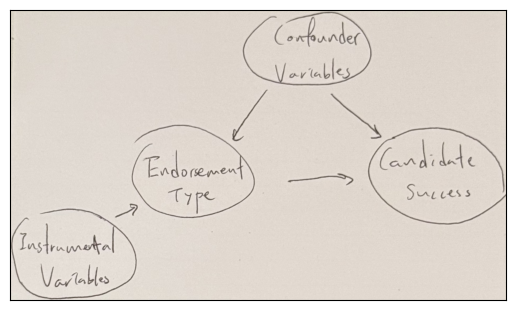

In [124]:
# DAG
import matplotlib.image as mpimg
img = mpimg.imread('DAG.png')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)

## Results

Using lab 8 as a reference, we will split our regression method into 2 parts, in the first stage, we will predict the treatment variables with the instrumental variables with logistic regression as all the features we are using are binary. Then, we will regress the candidate's success in the primary election onto the predicted treatment variables. Additionally, because there exists confounders, we will be addressing them using propensity scores and matching technique.

We will first estimate the causal effect of all types of endorsements in `dem_candidates.csv` on the `Won Primary`. 

#### Stage 1
$Y^{(i)} = \beta_1 Z^{(i)} + \beta_2 X^{(i)} + \epsilon^{(i)}$
where:
- $ Y^{(i)} $: `Won Primary`
- $ Z^{(i)} $: all types of endorsements received by candidate $i$
- $ X^{(i)} $: `Race`, `Veteran?`, `LGBTQ?`
- $ \epsilon^{(i)} $: Random noise term capturing unobserved factors.

#### Stage 2:
$Z^{(i)} = \gamma_1 W^{(i)} + \gamma_2 X^{(i)} + \epsilon'^{(i)}$
where:
- $ Z^{(i)} $: `Party Support?`, `Emily Endorsed?`, `Biden Endorsed?`, `Warren Endorsed?`, `Sanders Endorsed?`, `Our Revolution Endorsed?`, `Justice Dems Endorsed?`, `PCCC Endorsed?`, `Indivisible Endorsed?`, `WFP Endorsed?`, `VoteVets Endorsed?`, `No Labels Support?`
- $ W^{(i)} $: `Race Type` (not ethnic race, but election race), `Elected Official?`, `Self-Funder?`, `STEM?`, `Obama Alum?`
- $ X^{(i)} $: `Race`, `Veteran?`, `LGBTQ?`
- $ \epsilon'^{(i)} $: Random noise term for unobserved factors affecting endorsements.   

In [324]:
dem.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
# convert text data into binary
treatments = [
    'Party Support?', 'Emily Endorsed?', 'Biden Endorsed?', 
    'Warren Endorsed? ', 'Sanders Endorsed?', 'Our Revolution Endorsed?',
    'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
    'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?'
]
confounders = ['Race', 'Veteran?', 'LGBTQ?']
instrumental_vars = ['Race Type', 'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?']  


# treatments
dem_numeric = dem.copy()
for col in treatments:
    dem_numeric[col] = dem_numeric[col].apply(lambda x: 1 if str(x) == 'Yes' else 0)

# confounders
dem_numeric['Race'] = dem_numeric['Race'].apply(lambda x: 1 if str(x) == 'White' else 0)
for col in confounders[1:]:
    dem_numeric[col] = dem_numeric[col].apply(lambda x: 1 if str(x) == 'Yes' else 0)

# instrumentals
dem_numeric['Race Type'] = dem_numeric['Race Type'].apply(lambda x: 1 if str(x) == 'Regular' else 0)
for col in instrumental_vars[1:]:
    dem_numeric[col] = dem_numeric[col].apply(lambda x: 1 if str(x) == 'Yes' else 0)
    
# outcome
dem_numeric['Won Primary'] = dem_numeric['Won Primary'].apply(lambda x: 1 if str(x) == 'Yes' else 0)

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors


propensity_features = confounders + instrumental_vars

results = []

for treatment in treatments:
    # propensity scores
    logistic = LogisticRegression(max_iter=1000)
    X = dem_numeric[propensity_features]  
    y = dem_numeric[treatment]
    logistic.fit(X, y)
    dem_numeric['Propensity Score'] = logistic.predict_proba(X)[:, 1]
    
    # matching
    treated = dem_numeric[dem_numeric[treatment] == 1]
    untreated = dem_numeric[dem_numeric[treatment] == 0]
    
    nn = NearestNeighbors(n_neighbors=1)  
    nn.fit(untreated[['Propensity Score']])  # propensity scores for matching
    distances, indices = nn.kneighbors(treated[['Propensity Score']])

    matched = treated.copy()
    matched['Matched Index'] = indices.flatten()
    matched['Matched Untreated'] = untreated.iloc[indices.flatten()].index
    matched_data = matched.merge(
        untreated, 
        left_on='Matched Untreated', 
        right_index=True, 
        suffixes=('_Treated', '_Untreated')
    )
    
    treated_outcomes = matched_data['Won Primary_Treated']
    untreated_outcomes = matched_data['Won Primary_Untreated']
    
    ate = (treated_outcomes - untreated_outcomes).mean()
    
    results.append({
        'Treatment': treatment,
        'ATE': ate
    })

results_df = pd.DataFrame(results).sort_values(by='ATE', ascending=False)
results_df

,Treatment,ATE
0,Party Support?,0.769231
8,Indivisible Endorsed?,0.608696
3,Warren Endorsed?,0.600000
10,VoteVets Endorsed?,0.535714
2,Biden Endorsed?,0.400000
1,Emily Endorsed?,0.277778
7,PCCC Endorsed?,0.133333
9,WFP Endorsed?,0.133333
4,Sanders Endorsed?,0.000000
11,No Labels Support?,0.000000


A positive ATE indicates the treatment improves the outcome, while a negative ATE suggests it worsens the outcome. From the table, we can see that democratic candidates with party support are 77% more likely to win the primary than similar candidates without party support, followed by endorsements from Indivisible and Elizabeth Warren. On the other hand, endorsements from Our Revolution and Justice Democrats are 42% less likely to win the primary than other democratic candidates.

Similarly, we will now process `rep_candidates.csv` on the `Won Primary`. However, because this dataset did not provide any other variables that could be identified as confounders or instrumental variables, we will be assuming unconfoundness and will solely estimate the treatment effect on the outcome without additional adjustments.

In [371]:
rep.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,NaN,On the Ballot,61.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,NaN,NaN,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,NaN,NaN,31.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,NaN,NaN,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,NaN,NaN,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
# convert text data into binary
treatments = [
    'Rep Party Support?', 'Trump Endorsed?', 'Bannon Endorsed?', 
    'Great America Endorsed?', 'NRA Endorsed?', 'Right to Life Endorsed?',
    'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
    'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
    'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?'
]

# treatments
rep_numeric = rep.copy()
for col in treatments:
    rep_numeric[col] = rep_numeric[col].apply(lambda x: 1 if str(x) == 'Yes' else 0)
    
# outcome
rep_numeric['Won Primary'] = rep_numeric['Won Primary'].apply(lambda x: 1 if str(x) == 'Yes' else 0)

In [370]:
X = rep_numeric[treatments]
y = rep_numeric['Won Primary']
logistic.fit(X, y)

coefficients = logistic.coef_[0]

results = {'Endorsement': treatments, 'Coefficients': logistic.coef_[0]}
results_df = pd.DataFrame(results).sort_values(by='Coefficients', ascending=False)
results_df

,Endorsement,Coefficients
1,Trump Endorsed?,1.479244
8,Koch Support?,1.231243
0,Rep Party Support?,1.124460
11,Main Street Endorsed?,0.736285
2,Bannon Endorsed?,0.453763
7,Club for Growth Endorsed?,0.427907
4,NRA Endorsed?,0.356309
10,Tea Party Endorsed?,0.327340
5,Right to Life Endorsed?,0.247445
9,House Freedom Support?,0.236141


Based on the coefficients, we can see that candidates endorsed by Donald Trump has a significant positive effect on the likelihood of winning the primary election, followed by endorsements from Koch brothers’ political network and National Republican Senatorial Committee, and it looks like endorsements from Susan B. Anthony List slightly reduces the likelihood of winning the primary election.